In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
dados = pd.read_csv('LeaguePlayerStats.csv', sep=",")

O Objetivo desse projeto é realizar uma análise sobre um dataset do jogo League of Legends. Procurarei por alguns padrões específicos e para exemplificar por exemplo, padrões especificos em ranks mais altos que não são presentes em ranks menores, para por exemplo mostrar que aspectos dentro do jogo fazem um Ferro ser ferro e um Mestre ser Mestre, além de identificar padrões específicos em cada rota do jogo

Agora irei exibir inicialmente a base de dados, para saber como ele está no momento


In [45]:
dados

,nomeInvocador,nivelInvocador,classificacao,vitorias,derrotas,taxaVitoria,abates,mortes,assistencias,rotaPreferida,...,ouroObtido,torresDestruidas,pontuacaoVisao,dragoesAbatidos,tempoMaximoVivo,danoTotalCausado,danoTotalRecebido,duracaoPartida,inicioPartida,KDA
0,RoséPosié,712,BRONZE,13,12,0.52,3.20,6.72,15.36,SUPPORT,...,8982.20,1,45.56,0,506.96,48651.12,544240,28.566667,7.216000,2.761905
2,SilverHawk0,340,BRONZE,11,14,0.44,8.20,9.00,7.88,TOP,...,13236.60,1,19.96,0,438.64,150665.56,743065,30.250667,16.724667,1.786667
4,B3tterTh4nYo0,124,BRONZE,8,17,0.32,5.24,7.32,8.76,JUNGLE,...,11655.24,0,21.28,0,563.40,152541.04,652545,29.800000,13.505333,1.912568
5,cndyksh,463,BRONZE,16,9,0.64,8.44,6.96,6.44,TOP,...,12595.80,2,16.28,0,490.44,122873.72,839827,28.432667,17.368000,2.137931
7,DawnOfWarr,642,BRONZE,11,14,0.44,10.04,8.40,8.68,MIDDLE,...,13852.64,1,14.20,0,511.12,151318.88,743666,30.590667,16.532000,2.228571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Lerni,385,SILVER,14,11,0.56,6.88,8.76,12.84,SUPPORT,...,12347.68,2,39.56,0,538.12,99039.08,747853,32.621333,19.408000,2.251142
2279,Shue,244,SILVER,10,15,0.40,7.16,6.16,7.04,ADC,...,13839.08,1,11.12,0,498.76,120871.04,572329,26.500000,15.902667,2.305195
2280,DarkLady Lilith,516,SILVER,12,13,0.48,7.36,6.04,12.92,MIDDLE,...,12483.88,2,36.24,0,634.64,124161.88,540583,31.024000,15.213333,3.357616
2282,EasyEichel,312,SILVER,15,10,0.60,9.20,8.04,8.36,MIDDLE,...,13425.88,1,14.48,0,374.04,196456.52,809734,28.762667,15.082667,2.184080


In [26]:
# dicionário de tradução
traducao_colunas = {
    "summonerName": "nomeInvocador",
    "summonerLevel": "nivelInvocador",
    "rank": "classificacao",
    "wins": "vitorias",
    "losses": "derrotas",
    "winRate": "taxaVitoria",
    "kills": "abates",
    "deaths": "mortes",
    "assists": "assistencias",
    "prefLane": "rotaPreferida",
    "campsKilled": "monstrosSelvaMortos",
    "minionsKilled": "tropasAbatidas",
    "goldEarned": "ouroObtido",
    "turretTakedowns": "torresDestruidas",
    "visionScore": "pontuacaoVisao",
    "dragonKills": "dragoesAbatidos",
    "longestTimeSpentLiving": "tempoMaximoVivo",
    "totalDamageDealt": "danoTotalCausado",
    "totalDamageTaken": "danoTotalRecebido",
    "gameDuration": "duracaoPartida",
    "gameStart": "inicioPartida"
}

# supondo que seu DataFrame se chama df
dados = dados.rename(columns=traducao_colunas)

In [27]:
dados

,nomeInvocador,nivelInvocador,classificacao,vitorias,derrotas,taxaVitoria,abates,mortes,assistencias,rotaPreferida,...,tropasAbatidas,ouroObtido,torresDestruidas,pontuacaoVisao,dragoesAbatidos,tempoMaximoVivo,danoTotalCausado,danoTotalRecebido,duracaoPartida,inicioPartida
0,RoséPosié,712,BRONZE,13,12,0.52,3.20,6.72,15.36,SUPPORT,...,50.32,8982.20,1,45.56,0,506.96,48651.12,544240,28.566667,7.216000
1,Xest,199,BRONZE,12,13,0.48,8.36,5.72,14.44,SUPPORT,...,47.40,11866.56,0,29.96,0,494.00,78143.68,441284,24.580667,16.400000
2,SilverHawk0,340,BRONZE,11,14,0.44,8.20,9.00,7.88,TOP,...,186.16,13236.60,1,19.96,0,438.64,150665.56,743065,30.250667,16.724667
3,Res93,61,BRONZE,12,13,0.48,8.60,7.52,8.20,ADC,...,190.00,13367.08,2,25.36,0,558.36,170517.52,594545,30.931333,17.265333
4,B3tterTh4nYo0,124,BRONZE,8,17,0.32,5.24,7.32,8.76,JUNGLE,...,97.76,11655.24,0,21.28,0,563.40,152541.04,652545,29.800000,13.505333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,DarkLady Lilith,516,SILVER,12,13,0.48,7.36,6.04,12.92,MIDDLE,...,138.36,12483.88,2,36.24,0,634.64,124161.88,540583,31.024000,15.213333
2281,IceTeaTs,241,SILVER,9,16,0.36,7.40,7.96,11.68,NONE,...,98.52,12285.04,1,9.44,0,346.32,97369.36,521546,22.320000,14.589333
2282,EasyEichel,312,SILVER,15,10,0.60,9.20,8.04,8.36,MIDDLE,...,87.72,13425.88,1,14.48,0,374.04,196456.52,809734,28.762667,15.082667
2283,popomu elleyin,520,SILVER,9,16,0.36,6.36,7.76,7.92,NONE,...,103.88,14513.68,1,24.40,0,404.08,143844.24,826660,29.032000,14.207333


Retirando duplicadas de nomes de invocadores e fazendo outros ajustes

In [28]:
# Passo 1: Conta ocorrências de cada nome
contagem_nomes = dados['nomeInvocador'].value_counts()

# Passo 2: Filtra apenas os nomes que aparecem mais de uma vez
nomes_duplicados = contagem_nomes[contagem_nomes > 1].index.tolist()

print("Nomes duplicados (únicos):")
print(nomes_duplicados)

# Removendo os nomes duplicados
dados = dados.query("nomeInvocador not in @nomes_duplicados")

# Removendo as rotas preferidas qque são NONE
dados = dados.query("rotaPreferida != 'NONE'")

Nomes duplicados (únicos):
['Quatteri', 'Hollywood Matze', 'Blade40', 'XyIIow', 'avarice61', 'On3Sh0t Fanboy', 'ELLHNIKO ADC ', 'cadianNN', 'dridro', 'ZacoiPT13', 'Im Yoms', 'Hekat231', 'Inferior AD', 'TakeSet sama', 'see you later eu', 'Varry', 'handsome carl', 'el Adryh', 'Julbu', 'Mashlsonw3f3', 'HAZEL 2026', 'ACE Naceed', 'ure wonderful', 'KRYSIA2', '30th of November', 'lec reject1', 'vXin PaoPaoPW', 'Shinohara Akito', 'hovinko z kose', 'NightCoiiiiiin', 'XXXXXXXXY1', '15 02 2022', 'Amenogozen', 'Don Noway', 'Lofti', 'YameteOniiiiChan', 'B0LULU', 'SPOONKING', 'Tanetel1', 'Upset33', 'Theocacs', 'Banino IMPAZZITO', 'StrongRengo73', 'bG92ZSBuaWdnZXJz', 'Galáxias', 'Next Season When', '420WeabooSlayer', 'ManoloGap', 'TwTv Odysseus131', 'reoace', 'Vizícsacsi', 'AloisNL', 'Tezhak', '3arbi ferhan', 'MoeSakr', 'Magic', 'a ronins purpose', 'Merlhin', 'Jowiszjaaa', 'RSJFBvPe', 'Lord Lunddorf', 'Geralt', 'hmyok', 'Kamiloo', 'Aluksi', 'Echo2017', 'lets smile', 'Qu1ao', '0YouCan SeeMe', 'RED SH

Criar algumas novas variáveis a partir das existentes

In [29]:
# Calcular KDA (Kills/Deaths/Assists)
dados['KDA'] = (dados['abates'] + dados['assistencias']) / dados['mortes'].replace(0, 1)  # Evita divisão por zero

Assim ficará o dataset após as alterações

In [30]:
dados

,nomeInvocador,nivelInvocador,classificacao,vitorias,derrotas,taxaVitoria,abates,mortes,assistencias,rotaPreferida,...,ouroObtido,torresDestruidas,pontuacaoVisao,dragoesAbatidos,tempoMaximoVivo,danoTotalCausado,danoTotalRecebido,duracaoPartida,inicioPartida,KDA
0,RoséPosié,712,BRONZE,13,12,0.52,3.20,6.72,15.36,SUPPORT,...,8982.20,1,45.56,0,506.96,48651.12,544240,28.566667,7.216000,2.761905
2,SilverHawk0,340,BRONZE,11,14,0.44,8.20,9.00,7.88,TOP,...,13236.60,1,19.96,0,438.64,150665.56,743065,30.250667,16.724667,1.786667
4,B3tterTh4nYo0,124,BRONZE,8,17,0.32,5.24,7.32,8.76,JUNGLE,...,11655.24,0,21.28,0,563.40,152541.04,652545,29.800000,13.505333,1.912568
5,cndyksh,463,BRONZE,16,9,0.64,8.44,6.96,6.44,TOP,...,12595.80,2,16.28,0,490.44,122873.72,839827,28.432667,17.368000,2.137931
7,DawnOfWarr,642,BRONZE,11,14,0.44,10.04,8.40,8.68,MIDDLE,...,13852.64,1,14.20,0,511.12,151318.88,743666,30.590667,16.532000,2.228571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Lerni,385,SILVER,14,11,0.56,6.88,8.76,12.84,SUPPORT,...,12347.68,2,39.56,0,538.12,99039.08,747853,32.621333,19.408000,2.251142
2279,Shue,244,SILVER,10,15,0.40,7.16,6.16,7.04,ADC,...,13839.08,1,11.12,0,498.76,120871.04,572329,26.500000,15.902667,2.305195
2280,DarkLady Lilith,516,SILVER,12,13,0.48,7.36,6.04,12.92,MIDDLE,...,12483.88,2,36.24,0,634.64,124161.88,540583,31.024000,15.213333,3.357616
2282,EasyEichel,312,SILVER,15,10,0.60,9.20,8.04,8.36,MIDDLE,...,13425.88,1,14.48,0,374.04,196456.52,809734,28.762667,15.082667,2.184080


1. Primeiramente vou fazer algumas análises em relação a taxa de vitória

1.1 Primeiramente criarei uma categoria para ordenar os ranks

In [ ]:
#Aqui estou exibindo as diferentes classificações existentes
dados['classificacao'].unique()

ordem_ranks = [ 'IRON','BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'EMERALD', 'DIAMOND', 'MASTER' ]

# Ordenando a classificação
rank_ordenado = dados['classificacao'] = pd.Categorical(
    dados['classificacao'],
    categories=ordem_ranks,
    ordered=True
) 

1.2 Aqui estou pegando as 100 partidas com a maior taxa de vitória presente no dataset

In [33]:
# Top 100 jogadores com maior taxa de vitória, utilizando a função nlargest eu pego as maiores incidências
top_100_vitoria = dados.nlargest(100, 'taxaVitoria')[['nomeInvocador', 'taxaVitoria', 'rotaPreferida', 'classificacao']]

print("O maior rank entre os 100 jogadores com maior taxa de vitória é:", top_100_vitoria['classificacao'].value_counts().sort_index().idxmax())
print("A rota mais frequente entre os 100 jogadores com maior taxa de vitória é:", top_100_vitoria['rotaPreferida'].value_counts().sort_index().idxmax())

O maior rank entre os 100 jogadores com maior taxa de vitória é: DIAMOND
A rota mais frequente entre os 100 jogadores com maior taxa de vitória é: MIDDLE


1.3 Aqui estou pegando as 100 partidas com a menor taxa de vitória presente no dataset

In [34]:
# Top 100 jogadores com maior taxa de derrota, utilizando a função nsmallest eu pego as maiores incidências

top_100_derrota = dados.nsmallest(100, 'taxaVitoria')[['nomeInvocador', 'taxaVitoria', 'rotaPreferida', 'classificacao']]

print("O maior rank entre os 100 jogadores com menor taxa de vitória é:", top_100_derrota['classificacao'].value_counts().sort_index().idxmax())
print("A rota mais frequente entre os 100 jogadores com menor taxa de vitória é:", top_100_derrota['rotaPreferida'].value_counts().sort_index().idxmax())

O maior rank entre os 100 jogadores com menor taxa de vitória é: IRON
A rota mais frequente entre os 100 jogadores com menor taxa de vitória é: SUPPORT


1.4 Agora pegarei esses mesmos dados, mas sobre o dataset inteiro

C:\Users\Emidio\AppData\Local\Temp\ipykernel_14424\1209632214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_rank = dados.groupby('classificacao')['taxaVitoria'].mean().sort_index()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'IRON'),
  Text(1, 0, 'BRONZE'),
  Text(2, 0, 'SILVER'),
  Text(3, 0, 'GOLD'),
  Text(4, 0, 'PLATINUM'),
  Text(5, 0, 'EMERALD'),
  Text(6, 0, 'DIAMOND'),
  Text(7, 0, 'MASTER')])

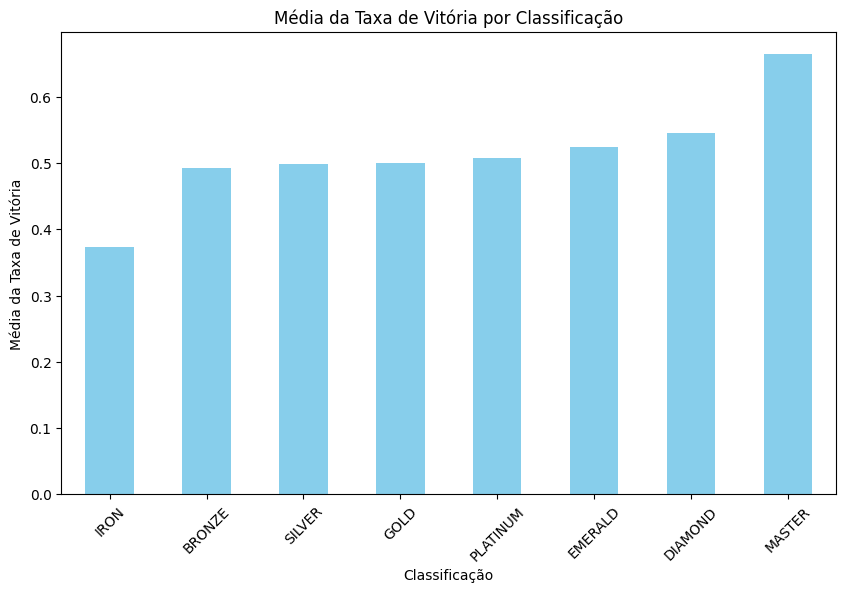

In [35]:
media_por_rank = dados.groupby('classificacao')['taxaVitoria'].mean().sort_index()

plt.figure(figsize=(10, 6))
media_por_rank.plot(kind='bar', color='skyblue')

plt.title('Média da Taxa de Vitória por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Média da Taxa de Vitória')
plt.xticks(rotation=45)

Nesse gráfico, há um equilibrio entre os ranks intermediários e uma defasagem nas bordas, o que pode evidenciar a presença dessas pessoas nesses ranks, já que os Iron perdem muito e por isso são Iron e com baixa taxa de vitória e o inverso ocorre com os Master. Também é importante ressaltar que cada rank pode enfrentar nas partidas jogadores 1 rank acima e 1 rank abaixo em algumas partida (Iron x Bronze ou Master x Diamond)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ADC'),
  Text(1, 0, 'JUNGLE'),
  Text(2, 0, 'MIDDLE'),
  Text(3, 0, 'SUPPORT'),
  Text(4, 0, 'TOP')])

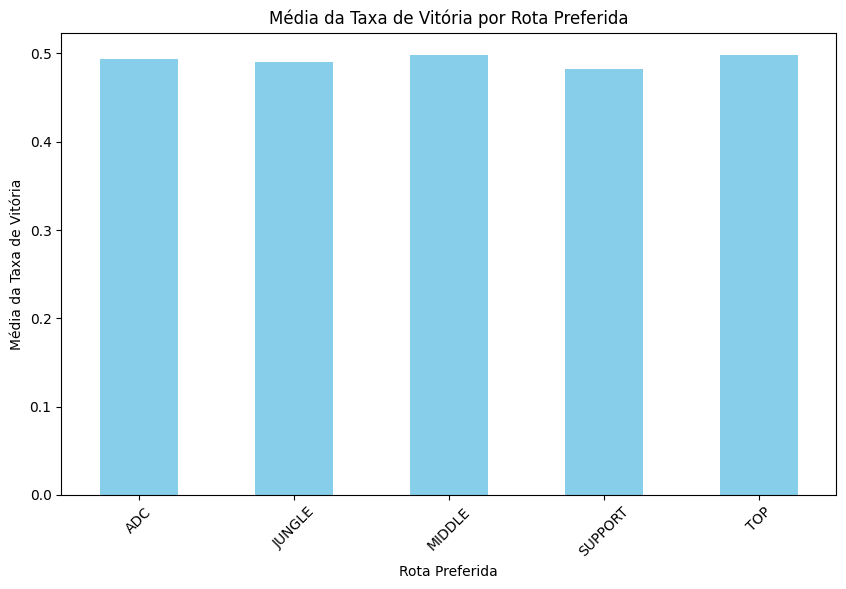

In [36]:
media_por_rank = dados.groupby('rotaPreferida')['taxaVitoria'].mean().sort_index()

plt.figure(figsize=(10, 6))
media_por_rank.plot(kind='bar', color='skyblue')

plt.title('Média da Taxa de Vitória por Rota Preferida')
plt.xlabel('Rota Preferida')
plt.ylabel('Média da Taxa de Vitória')
plt.xticks(rotation=45)

A taxa de vitória por rota preferida, há um equilibrio, então não há nada muito conclusivo para se tirar disso

2. Qual a quantidade de jogadores por rota e por rank presente no dataset?

               Jogadores
classificacao           
IRON                 250
BRONZE               232
SILVER               237
GOLD                 219
PLATINUM             228
EMERALD              251
DIAMOND              260
MASTER                10


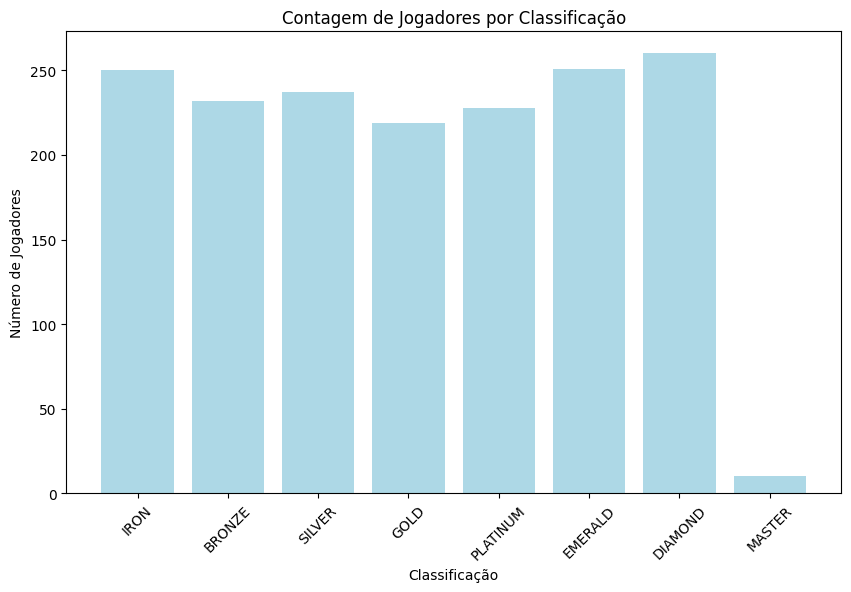

In [37]:
contagem_por_rank = dados['classificacao'].value_counts().sort_index()
media_com_contagem = pd.DataFrame({
    'Jogadores': contagem_por_rank,
})
print(media_com_contagem)

plt.figure(figsize=(10, 6))
plt.bar(media_com_contagem.index, media_com_contagem['Jogadores'], color='lightblue')
plt.title('Contagem de Jogadores por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Número de Jogadores')
plt.xticks(rotation=45)
plt.show()


Apenas um dado demonstrativo da base fornecida em relação as variáveis que estou trabalhando nesse análise de dados, é possivel notar que o número de rank de master é muito pequeno para o estudo, então os resultados em relação a esse rank podem de alguma forma serem defasados por possuir poucos dados

               Jogadores
rotaPreferida           
ADC                  323
JUNGLE               333
MIDDLE               417
SUPPORT              333
TOP                  281


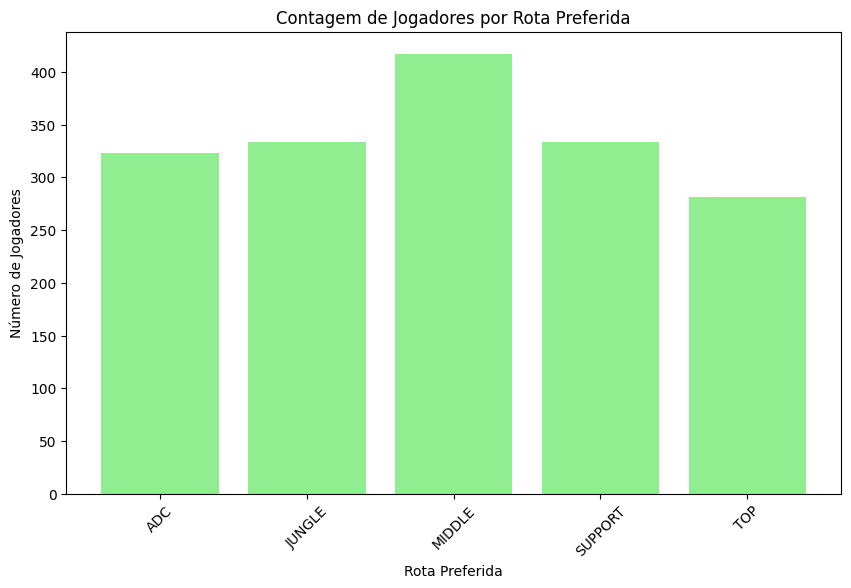

In [38]:
contagem_por_rota = dados['rotaPreferida'].value_counts().sort_index()
media_com_contagem_rota = pd.DataFrame({
    'Jogadores': contagem_por_rota,
})
print(media_com_contagem_rota)

plt.figure(figsize=(10, 6))
plt.bar(media_com_contagem_rota.index, media_com_contagem_rota['Jogadores'], color='lightgreen')
plt.title('Contagem de Jogadores por Rota Preferida')
plt.xlabel('Rota Preferida')
plt.ylabel('Número de Jogadores')
plt.xticks(rotation=45)
plt.show()


Vemos aqui uma preferência dos jogadores pela rota MIDDLE, o que de certa forma é comum dentro do League of Legends, já que em muitos jogos é a rota de maior impacto nas partidas

3. Qual o dano médio causado por rota no jogo?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ADC'),
  Text(1, 0, 'JUNGLE'),
  Text(2, 0, 'MIDDLE'),
  Text(3, 0, 'SUPPORT'),
  Text(4, 0, 'TOP')])

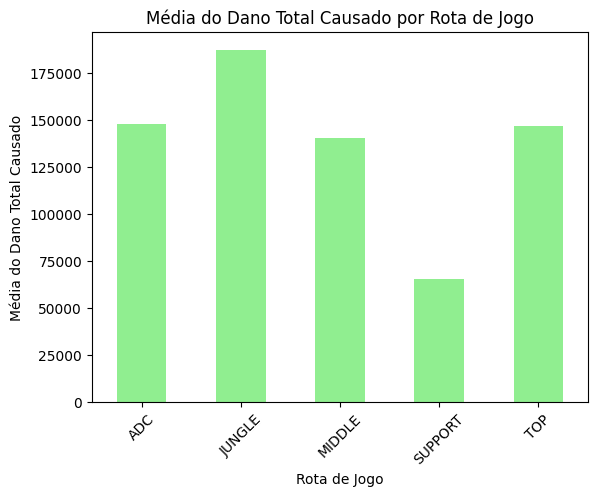

In [39]:
media_por_rota = dados.groupby('rotaPreferida')['danoTotalCausado'].mean()

media_por_rota.plot(kind='bar', color='lightgreen')
plt.title('Média do Dano Total Causado por Rota de Jogo')
plt.xlabel('Rota de Jogo')
plt.ylabel('Média do Dano Total Causado')
plt.xticks(rotation=45)



Em relação ao gráfico, é comum que o dano da rota de suporte seja a menor dentre todas, mas existe um estranhamento, a rota do Middle estar com dano menor que TOP e JUNGLE. Normalmente o mid costumam jogar campeão que possuem alta capacidade de causar dano, o que não ocorre sempre nas rotas de TOP e JUNGLE, mas pode ser algo comum, já que se tratam de filas ranqueadas e elas não seguem sempre a lógica dos jogos competitivos, dado isso, vou investigar porque isso está ocorrendo

C:\Users\Emidio\AppData\Local\Temp\ipykernel_14424\3226295552.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_media = dados.groupby(['rotaPreferida', 'classificacao'])['danoTotalCausado'].mean().unstack()


<Figure size 1400x800 with 0 Axes>

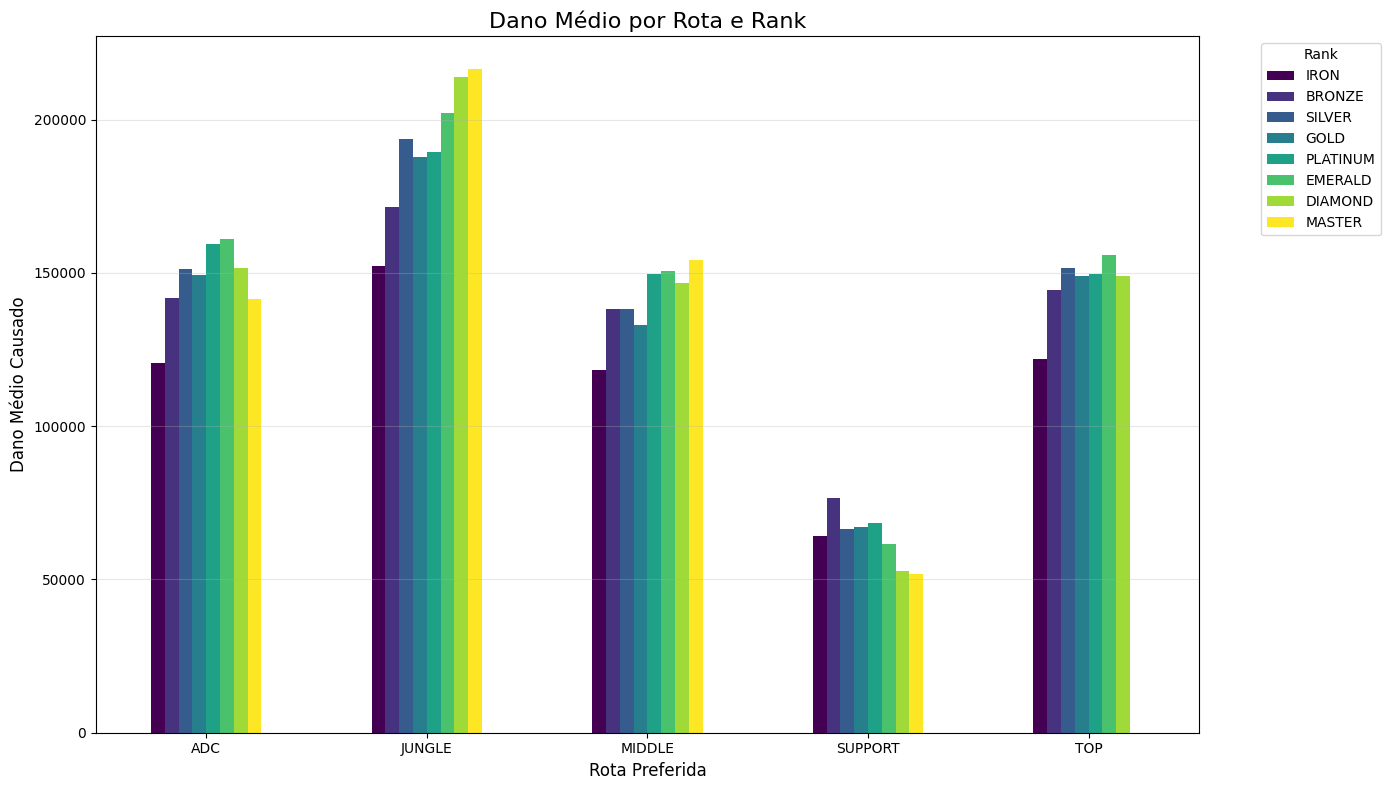

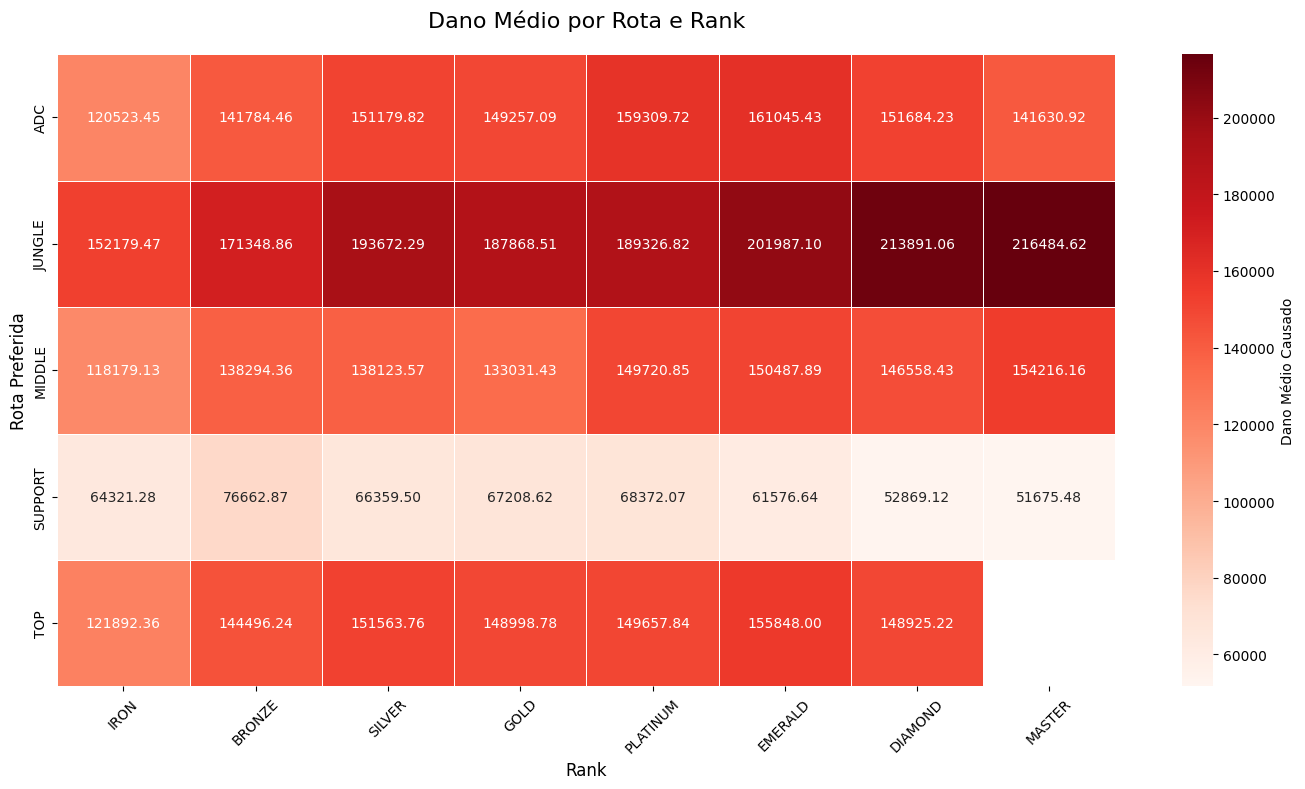

In [40]:
# Usando unstack() para transformar em tabela
tabela_media = dados.groupby(['rotaPreferida', 'classificacao'])['danoTotalCausado'].mean().unstack()

plt.figure(figsize=(14, 8))
tabela_media.round(2).plot(kind='bar', 
                          figsize=(14, 8),
                          colormap='viridis')
plt.title('Dano Médio por Rota e Rank', fontsize=16)
plt.xlabel('Rota Preferida', fontsize=12)
plt.ylabel('Dano Médio Causado', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(tabela_media.round(2), 
            annot=True, 
            fmt='.2f', 
            cmap='Reds', 
            linewidths=0.5,
            cbar_kws={'label': 'Dano Médio Causado'})
plt.title('Dano Médio por Rota e Rank', fontsize=16, pad=20)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Rota Preferida', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ao analisar o primeiro gráfico, chamado de gráfico de barras agrupadas, é possivel notar que em todos os ranks a rota da jungle está acima das demais, então é um padrão presente em todos os elos os jogadores pegaram campeões com capacidades de causar mais dano nas partidas, isso fica mais claro no gráfico de heatmap logo abaixo

4. Qual é a pontuação de visão média por rota e por rank?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ADC'),
  Text(1, 0, 'JUNGLE'),
  Text(2, 0, 'MIDDLE'),
  Text(3, 0, 'SUPPORT'),
  Text(4, 0, 'TOP')])

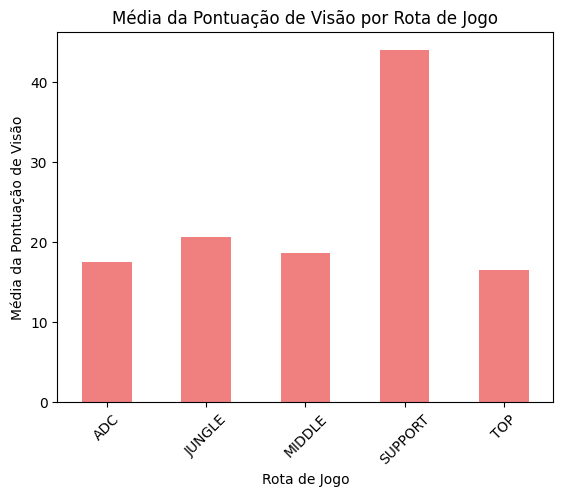

In [41]:
media_visao_por_rota = dados.groupby('rotaPreferida')['pontuacaoVisao'].mean()
media_visao_por_rota.plot(kind='bar', color='lightcoral')
plt.title('Média da Pontuação de Visão por Rota de Jogo')
plt.xlabel('Rota de Jogo')
plt.ylabel('Média da Pontuação de Visão')
plt.xticks(rotation=45)


Aqui vemos um valor na pontuação de visão muito maior na rota de suporte em relação as demais lanes, o que já é esperado, visto que no League of Legends os suportes são os que mais limpam as wards (sentinelas que dão visão em uma determinada área do mapa), já que é o principal responsável do jogo por isso.

classificacao
IRON        17.318080
BRONZE      23.378458
SILVER      24.735190
GOLD        23.735540
PLATINUM    23.579825
EMERALD     24.803028
DIAMOND     26.187538
MASTER      27.028000
Name: pontuacaoVisao, dtype: float64


C:\Users\Emidio\AppData\Local\Temp\ipykernel_14424\2870863163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_visao_por_rota = dados.groupby('classificacao')['pontuacaoVisao'].mean()


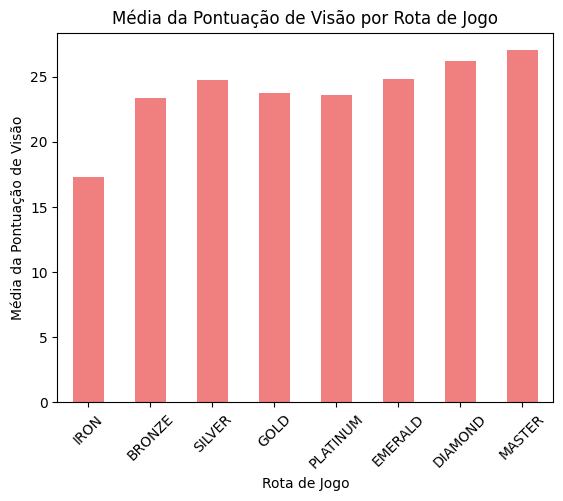

In [42]:
media_visao_por_rota = dados.groupby('classificacao')['pontuacaoVisao'].mean()
media_visao_por_rota.plot(kind='bar', color='lightcoral')
plt.title('Média da Pontuação de Visão por Rota de Jogo')
plt.xlabel('Rota de Jogo')
plt.ylabel('Média da Pontuação de Visão')
plt.xticks(rotation=45)

print(media_visao_por_rota.sort_index())

Aqui, é possivel notar que o rank Ferro é o que possui menor pontuação de visão, por ser o menor rank do jogo e muitas vezes os jogadores se preocupam pouco com essa questão, é comum que nesse rank a limpeza de sentinelas seja menor do que no rank mais elevados, então algo para que jogadores de ranks inferiores poderiam fazer para melhorar seu rank é se preocupar com a pontuação de visão dentro das partidas

5. Qual a quantidade de minons abatidos por rota e por rank?

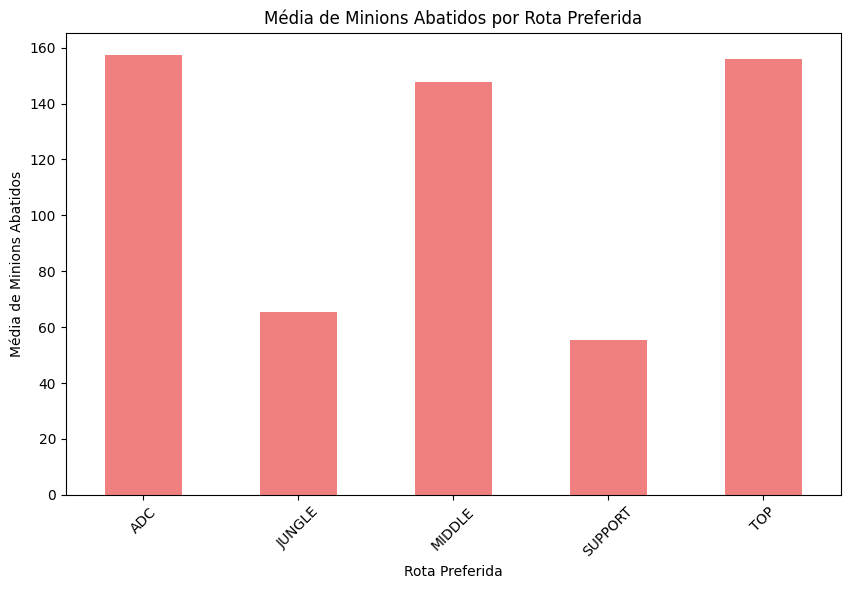

In [43]:
# Aqui eu agrupo por rota e dentro dela pego a média de minions abatidos
media_por_rota = dados.groupby('rotaPreferida')['tropasAbatidas'].mean().sort_index()

plt.figure(figsize=(10, 6))
media_por_rota.plot(kind='bar', color='lightcoral')
plt.title('Média de Minions Abatidos por Rota Preferida')
plt.xlabel('Rota Preferida')
plt.ylabel('Média de Minions Abatidos')
plt.xticks(rotation=45)
plt.show()


Aqui se nota uma equiparidade entre as rotas ADC, MIDDLE E TOP no quesito media de minons, e estão entre as maiores. Isso ocorre porque no League of Legends essas são as 3 posições de captam a maior parte dos recursos em cada uma das solo lanes, enquanto o jungle capta os recursos da selva por exemplo, então é um resultado já esperado

C:\Users\Emidio\AppData\Local\Temp\ipykernel_14424\3106643326.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_classificacao = dados.groupby('classificacao')['tropasAbatidas'].mean().sort_index()


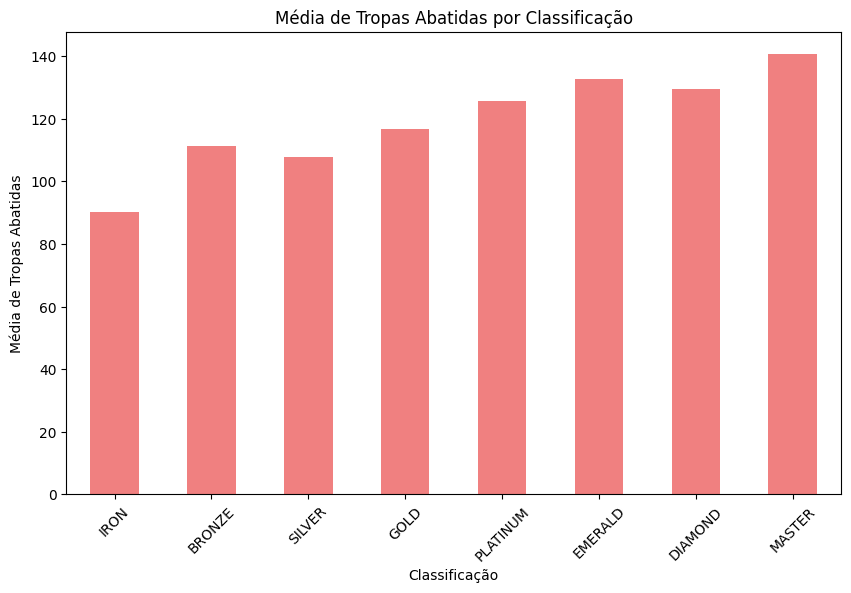

In [44]:
media_por_classificacao = dados.groupby('classificacao')['tropasAbatidas'].mean().sort_index()

plt.figure(figsize=(10, 6))
media_por_classificacao.plot(kind='bar', color='lightcoral')
plt.title('Média de Tropas Abatidas por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Média de Tropas Abatidas')
plt.xticks(rotation=45)
plt.show()

Vemos aqui um padrão comum presente em ranks mais altos que não são tão presentes em elos mais baixos, a media de tropas abatidas por jogo, então algo a se mudar para conseguir evoluir de rank é começar a se preocupar mais com essa questão, já que é possivel notar que em ranks mais altos é uma tendência ter uma melhor média de tropas abatidas

6. Jogadores com nivel maiores tendem a ter melhores ranks?